In [12]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import time

In [13]:
#import data
file_path = 'human emotion dataset/data.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,path,label
0,0,Surprise/1bd930d6a1c717c11be33db74823f661cb53f...,Surprise
1,1,Surprise/cropped_emotions.100096~12fffff.png,Surprise
2,2,Surprise/0df0e470e33093f5b72a8197fa209d684032c...,Surprise
3,3,Surprise/cropped_emotions.260779~12fffff.png,Surprise
4,4,Surprise/cropped_emotions.263616~12fffff.png,Surprise
...,...,...,...
14243,15448,Angry/cropped_emotions.571245~angry.png,Angry
14244,15449,Angry/cropped_emotions.232257~angry.png,Angry
14245,15450,Angry/cropped_emotions.232276~angry.png,Angry
14246,15451,Angry/0aa9ec997e4faa4499e0aa3efac5ab97db109423...,Angry


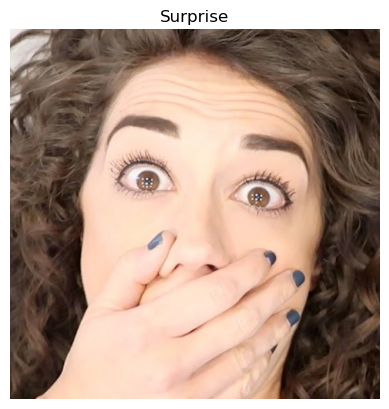

[[[243 237 237]
  [242 236 236]
  [241 236 233]
  ...
  [ 73  55  43]
  [ 82  64  50]
  [ 88  70  56]]

 [[241 235 235]
  [240 234 234]
  [240 234 234]
  ...
  [ 74  56  44]
  [ 85  67  53]
  [ 92  74  60]]

 [[242 238 237]
  [239 235 234]
  [238 234 233]
  ...
  [ 70  52  40]
  [ 84  66  54]
  [ 94  76  64]]

 ...

 [[ 53  36  26]
  [ 57  40  30]
  [ 60  43  33]
  ...
  [ 41  24  17]
  [ 36  21  14]
  [ 33  18  11]]

 [[ 50  33  23]
  [ 53  36  26]
  [ 57  40  30]
  ...
  [ 36  19  12]
  [ 34  19  12]
  [ 36  21  14]]

 [[ 47  30  20]
  [ 50  33  23]
  [ 54  37  29]
  ...
  [ 31  14   7]
  [ 37  20  13]
  [ 43  28  21]]]
Shape: (480, 480, 3)
None


In [14]:
#get image
row=0
image_path = 'human emotion dataset/dataset/'+df.iloc[row][1]
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off') 
plt.title(df.iloc[row][2])
plt.show()
img_array = np.array(img)
print(img_array)
print(print(f"Shape: {img_array.shape}"))

In [15]:
#image types
file_extensions = df['path'].apply(lambda x: os.path.splitext(x)[1])
unique_extensions = set(file_extensions)
unique_extensions= tuple(unique_extensions)

In [16]:
#resize images and store the image values

output_csv = 'images_with_labels_data.csv'
start_time = time.time()
target_size = (224, 224)

image_data = []

# get each images rgb values
for index, row in df.iterrows():
    relative_path = row[1]
    parent_directory = 'human emotion dataset/dataset/'
    img_path = os.path.join(parent_directory, relative_path)
    if os.path.isfile(img_path) and img_path.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.PNG', '.JPG', '.JPEG', '.BMP')):
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)  
            img_array = np.array(img).flatten() 
            image_data.append(img_array)
            
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
image_data=np.array(image_data)
print(image_data.shape)
print(image_data)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

(14248, 150528)
[[241 235 235 ...  37  21  14]
 [ 91  63  41 ... 128  94  66]
 [197  48 106 ...   2   1   0]
 ...
 [  0   0   0 ...  85  79  73]
 [190 193 184 ...  36  38  51]
 [255 255 255 ...  10  17  25]]
Execution time: 101.37 seconds


In [17]:
#save this to a new file because I dont want to run that every time
df['image_data'] = list(image_data)
df.to_csv('human emotion dataset/imageMatrixData.csv', index=False)  # index=False ensures the index is not saved


In [18]:
df=df = pd.read_csv('human emotion dataset/imageMatrixData.csv')
df

,Unnamed: 0,path,label,image_data
0,0,Surprise/1bd930d6a1c717c11be33db74823f661cb53f...,Surprise,[241 235 235 ... 37 21 14]
1,1,Surprise/cropped_emotions.100096~12fffff.png,Surprise,[ 91 63 41 ... 128 94 66]
2,2,Surprise/0df0e470e33093f5b72a8197fa209d684032c...,Surprise,[197 48 106 ... 2 1 0]
3,3,Surprise/cropped_emotions.260779~12fffff.png,Surprise,[200 194 175 ... 46 38 34]
4,4,Surprise/cropped_emotions.263616~12fffff.png,Surprise,[ 0 0 0 ... 45 48 81]
...,...,...,...,...
14243,15448,Angry/cropped_emotions.571245~angry.png,Angry,[ 0 0 0 ... 84 64 53]
14244,15449,Angry/cropped_emotions.232257~angry.png,Angry,[0 0 0 ... 0 0 0]
14245,15450,Angry/cropped_emotions.232276~angry.png,Angry,[ 0 0 0 ... 85 79 73]
14246,15451,Angry/0aa9ec997e4faa4499e0aa3efac5ab97db109423...,Angry,[190 193 184 ... 36 38 51]


In [19]:
#lets check images to make sure we have correctly mapped values to pictures
row=2000
image_data = df.iloc[row][3]
shape = (224, 224, 3)

image_data_reshaped = image_data.reshape(shape)

plt.subplot(1, 2, 1)  
plt.imshow(image_data_reshaped)
plt.axis('off')
plt.title("From pixel values")  


image_path = df.iloc[row]['path']  
parent_directory = 'human emotion dataset/dataset/'  
img_full_path = os.path.join(parent_directory, image_path)


img = Image.open(img_full_path)

plt.subplot(1, 2, 2)  
plt.imshow(img)
plt.axis('off')
plt.title("Original Image: " + df.iloc[row][2])  

plt.show()

AttributeError: 'str' object has no attribute 'reshape'